In [1]:
# -------------------------------------------
# Use this if you have an error about the SSL
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# -------------------------------------------

import nltk
# -----------------------
# Used when first run
# nltk.download('wordnet')
# nltk.download('stopwords')
# -----------------------

import pandas as pd
import re
import string

from langdetect import detect
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words()

from collections import Counter

# Remove unused Column and Save to new file

In [ ]:
data = pd.read_csv('dataset/INSTAGRAM_REVIEWS.csv')

# remove unused column
data.drop([ "number",
            "review_id", 
            "pseudo_author_id",
            "author_name",
            "review_likes",
            "author_app_version",
            "review_timestamp",
          ], inplace=True, axis=1)

#  change column name
data.rename(columns={'review_text': 'text'}, inplace=True)
data.rename(columns={'review_rating': 'sentiment'}, inplace=True)

#  save to new file
data.to_csv('dataset/dataset_cleaned_1.csv', index=False)

# PREPROCESSING

In [ ]:
def remove_numbers(text):
    if isinstance(text, str):
        return ''.join(char for char in text if not char.isdigit())
    else:
        return text

def remove_character(text):
    if isinstance(text, str):  # checks if a string value exists
        text = text.lower()  # converting to lowercase
        text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links
        text = re.sub(r"\b\d+\b", "", text)  # removing number
        text = re.sub('<.*?>+', '', text)  # removing special characters
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # punctuations
        text = re.sub('\n', '', text)
        text = re.sub('[’“”…]', '', text)
        return text
    else:
        return text

def remove_emoji(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text


def remove_short_form(text):
    if isinstance(text, str):
        # removing short form:
        text = re.sub("isn't", 'is not', text)
        text = re.sub("he's", 'he is', text)
        text = re.sub("wasn't", 'was not', text)
        text = re.sub("there's", 'there is', text)
        text = re.sub("couldn't", 'could not', text)
        text = re.sub("won't", 'will not', text)
        text = re.sub("they're", 'they are', text)
        text = re.sub("she's", 'she is', text)
        text = re.sub("There's", 'there is', text)
        text = re.sub("wouldn't", 'would not', text)
        text = re.sub("haven't", 'have not', text)
        text = re.sub("That's", 'That is', text)
        text = re.sub("you've", 'you have', text)
        text = re.sub("He's", 'He is', text)
        text = re.sub("what's", 'what is', text)
        text = re.sub("weren't", 'were not', text)
        text = re.sub("we're", 'we are', text)
        text = re.sub("hasn't", 'has not', text)
        text = re.sub("you'd", 'you would', text)
        text = re.sub("shouldn't", 'should not', text)
        text = re.sub("let's", 'let us', text)
        text = re.sub("they've", 'they have', text)
        text = re.sub("You'll", 'You will', text)
        text = re.sub("i'm", 'i am', text)
        text = re.sub("we've", 'we have', text)
        text = re.sub("it's", 'it is', text)
        text = re.sub("don't", 'do not', text)
        text = re.sub("that´s", 'that is', text)
        text = re.sub("I´m", 'I am', text)
        text = re.sub("it’s", 'it is', text)
        text = re.sub("she´s", 'she is', text)
        text = re.sub("he’s'", 'he is', text)
        text = re.sub('I’m', 'I am', text)
        text = re.sub('I’d', 'I did', text)
        text = re.sub("he’s'", 'he is', text)
        text = re.sub('there’s','there is',text)
        return text
    else:
        return text
    
def remove_multiple_space(text):
    if isinstance(text, str):
        text = text.strip()
        text = re.sub(r'\s+', ' ', text)
        return text
    else:
        return text


def detect_english(text):
    try:
        return detect(text) == 'en'
    except Exception as e:
        print(f"Error detecting language: {e} - {text}")
        return False
    
cnt = Counter()
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [ ]:
# remove number
data = pd.read_csv('dataset/dataset_cleaned_1.csv')
data['text'] = data['text'].apply(remove_numbers)
data.to_csv('dataset/dataset_cleaned_2.csv', index=False)


In [ ]:
# remove character
data = pd.read_csv('dataset/dataset_cleaned_2.csv')
data['text'] = data['text'].apply(remove_character)
data.to_csv('dataset/dataset_cleaned_3.csv', index=False)

In [ ]:
# remove emoji
data = pd.read_csv('dataset/dataset_cleaned_3.csv')
data['text'] = data['text'].apply(remove_emoji)
data.to_csv('dataset/dataset_cleaned_4.csv', index=False)

In [ ]:
# remove short form
data = pd.read_csv('dataset/dataset_cleaned_4.csv')
data['text'] = data['text'].apply(remove_short_form)
data.to_csv('dataset/dataset_cleaned_5.csv', index=False)

In [ ]:
# remove multiple space
data = pd.read_csv('dataset/dataset_cleaned_5.csv')
data['text'] = data['text'].apply(remove_multiple_space)
data.to_csv('dataset/dataset_cleaned_6.csv', index=False)

In [ ]:
# remove empty record and duplicate data
data = pd.read_csv('dataset/dataset_cleaned_6.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.to_csv('dataset/dataset_cleaned_7.csv', index=False)

In [ ]:
# remove record non-english
data = pd.read_csv('dataset/dataset_cleaned_7.csv')
data['is_english'] = data['text'].apply(detect_english)
data = data[data['is_english']]
data = data.drop(columns=['is_english'])
data.to_csv('dataset/dataset_cleaned_8.csv', index=False)

In [ ]:
# remove stop word:
data = pd.read_csv('dataset/dataset_cleaned_8.csv')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.to_csv('dataset/dataset_cleaned_9.csv', index=False)

In [ ]:
# remove empty record and duplicate data
data = pd.read_csv('dataset/dataset_cleaned_9.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.to_csv('dataset/dataset_cleaned_9.csv', index=False)

In [ ]:
# Remove the most frequent words:
data = pd.read_csv('dataset/dataset_cleaned_9.csv')
data["text"] = data["text"].apply(lambda text: remove_freqwords(text))
data.to_csv('dataset/dataset_cleaned_10.csv', index=False)

In [ ]:
# Change Rating
data = pd.read_csv('dataset/dataset_cleaned_10.csv')
data['sentiment'] = [0 if each in (1, 2, 3) else 1 for each in data.sentiment]
data.to_csv('dataset/dataset_cleaned_11.csv', index=False)

# Tokenization

In [2]:
data = pd.read_csv('dataset/dataset_cleaned_11.csv')
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['text'])

#split dataset
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['sentiment'], test_size=0.20, random_state=30)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Model Evaluation

In [3]:
model = ComplementNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')

print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 80.41%
------------------------------------------------
Confusion Matrix:
       0      1
0  76172  14642
1  17629  56329
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     90814
           1       0.79      0.76      0.78     73958

    accuracy                           0.80    164772
   macro avg       0.80      0.80      0.80    164772
weighted avg       0.80      0.80      0.80    164772



# Visualization 

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

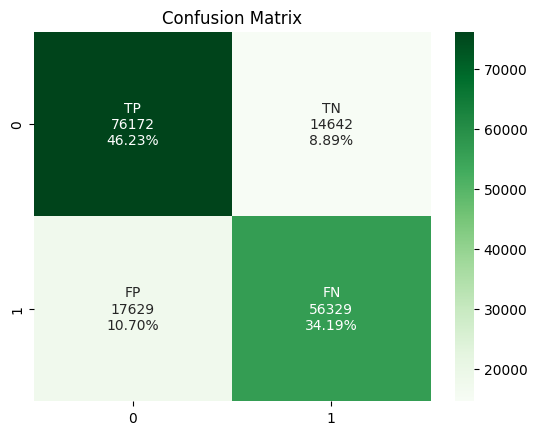

In [6]:
# Confusion Matrix Visualization
cf_matrix = confusion_matrix(y_test, predicted)

group_names = ['TP','TN','FP','FN']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.show()

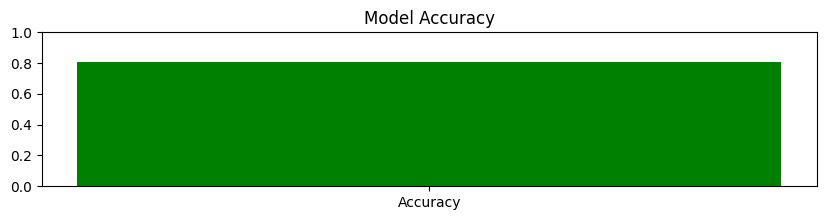

ComplementNB model accuracy is 80.41%


In [7]:
# Accuracy Visualization
accuracy_score = metrics.accuracy_score(predicted, y_test)
plt.figure(figsize=(10, 2))
plt.bar(['Accuracy'], [accuracy_score], color=['green'])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score*100))+'%')

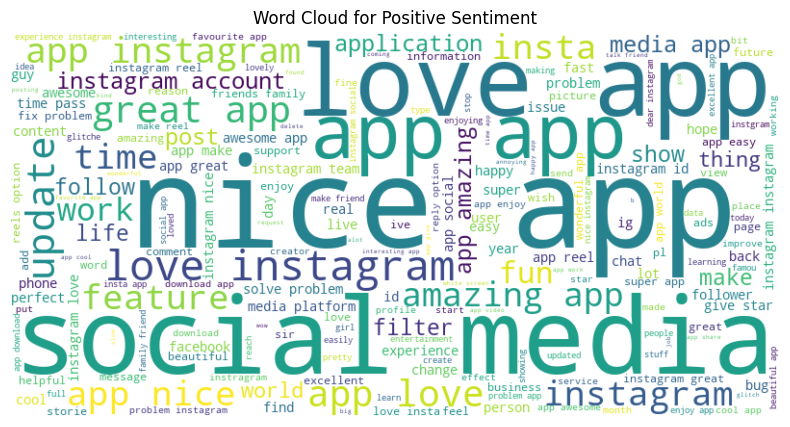

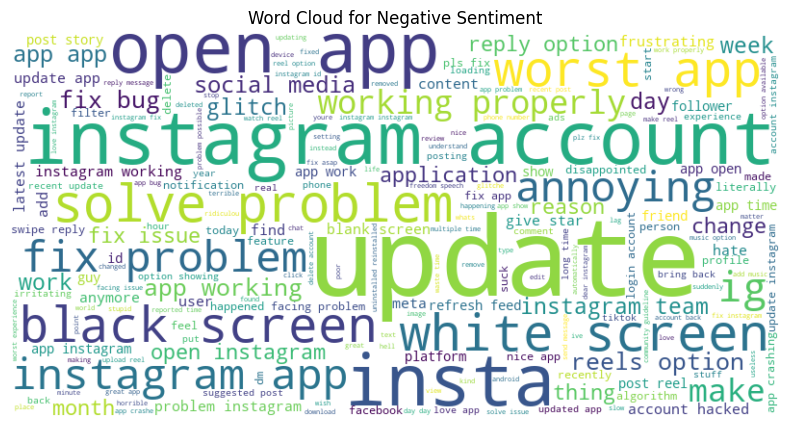

In [8]:
# Word Cloud Visualization
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Sentiment Positive
positive_text = ' '.join(data[data['sentiment'] == 1]['text'])
plot_wordcloud(positive_text, 'Word Cloud for Positive Sentiment')

# Sentiment Positive
negatif_text = ' '.join(data[data['sentiment'] == 0]['text'])
plot_wordcloud(negatif_text, 'Word Cloud for Negative Sentiment')

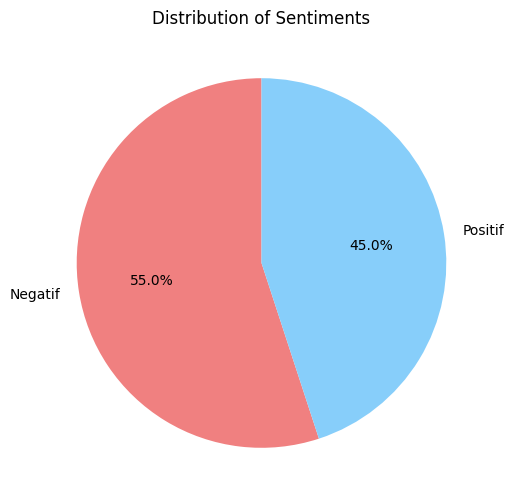

In [9]:
# Visualization Sentiment
data['sentiment'] = data['sentiment'].replace({1: 'Positif', 0: 'Negatif'})
sentiment_counts = data['sentiment'].value_counts()

# Visualization with pie charts
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Sentiments')
plt.show()